# Sentiment Analysis in Coronavirus Tweets

url: [link](https://www.youtube.com/watch?v=Pxk3uKd4Z2k&ab_channel=JCharisTech%26J-Secur1ty)

dataset: [link](https://www.kaggle.com/gpreda/covid19-tweets)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import warnings


In [2]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv"

df = pd.read_csv(url)

In [4]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

## Text Prepocessing

In [5]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [6]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [7]:
# Source / Value Count/ Distribution of the sources
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [8]:
df['source'].value_counts()

Twitter Web App           56891
Twitter for Android       40179
Twitter for iPhone        35472
TweetDeck                  8543
Hootsuite Inc.             7321
                          ...  
Emphatic                      1
App Political Hispanic        1
Chicken Nugget                1
JustVent.LIVE                 1
The Unshackled                1
Name: source, Length: 610, dtype: int64

In [9]:
# Plot the top value counts
df['source'].value_counts().nlargest(30)

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
Twitter for iPad            4336
Buffer                      2728
Sprout Social               1833
Instagram                   1759
IFTTT                       1545
dlvr.it                      681
GlobalPandemic.NET           679
LinkedIn                     628
COVID19-Updates              625
Twitter Media Studio         596
WordPress.com                537
HubSpot                      513
Sprinklr                     497
FS Poster                    414
Dynamic Signal               391
Resistbot Open Letters       390
Cheap Bots, Done Quick!      335
Paper.li                     322
Twitter for Advertisers      317
Blood Donors India           281
IAMBLOG2TWITTER              266
Alexander Higgins            225
Zoho Social                  224
The Social Jukebox           216
Fabrik.fm                    209
Name: sour

<AxesSubplot:>

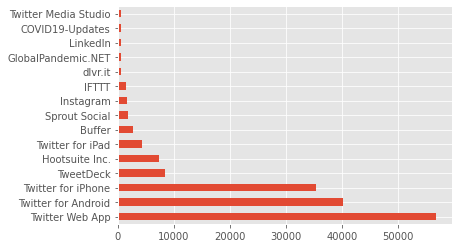

In [10]:
df['source'].value_counts().nlargest(15).plot(kind='barh')

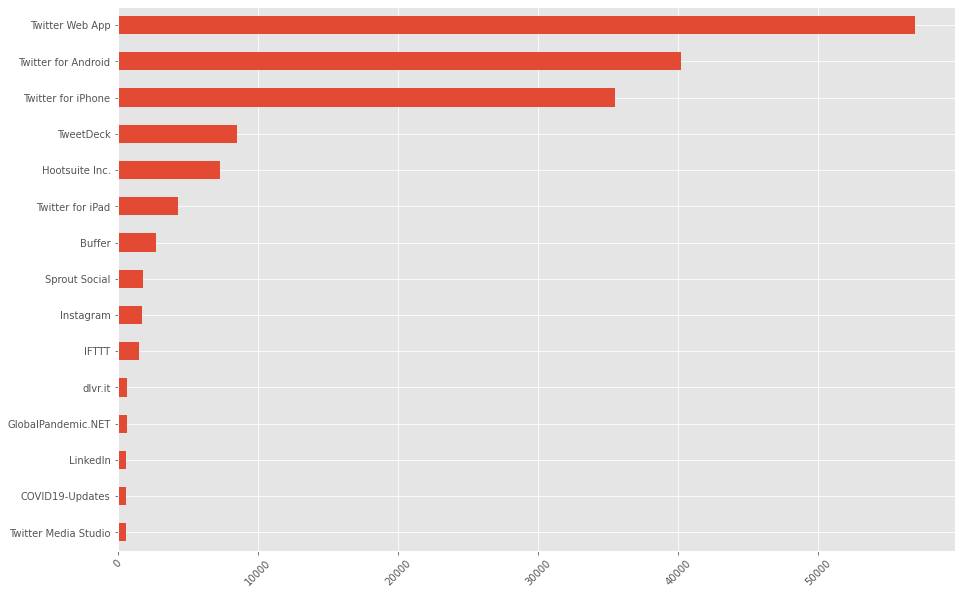

In [11]:
plt.figure(figsize=(15, 10))
ax = df['source'].value_counts().nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xticks(rotation=45)
plt.show()

## Text Anlaysis of tweet

In [12]:
!pip install neattext

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [13]:
# Load text cleaning package
import neattext.functions as nfx

In [14]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [15]:
df['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [16]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

### Noise
* Remove mentions/userhandless
* Remove hashtags
* URLS
* Emojis
* Special char

In [17]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [18]:
df['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [19]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [20]:
df[['extracted_hashtags', 'hashtags']]

extracted_hashtags                           hashtags
0                                    []                                NaN
1                                    []                                NaN
2                            [#COVID19]                        ['COVID19']
3                            [#COVID19]                        ['COVID19']
4       [#CoronaVirusUpdates, #COVID19]  ['CoronaVirusUpdates', 'COVID19']
...                                 ...                                ...
179103                     [#WearAMask]                      ['WearAMask']
179104                       [#COVID19]                        ['COVID19']
179105                               []                                NaN
179106                       [#COVID19]                        ['COVID19']
179107                               []                                NaN

[179108 rows x 2 columns]

### Cleaning Text

In [21]:
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [22]:
df[['text', 'clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  
3       @brookbanktv The one gift   has give me is an ...  
4       25 July : Media Bulletin on Novel     \n@kansa...  
...                                                   ...  
179103  Thanks @IamOhmai for nominating me for the @WH...  
179104  2020! The year of insanity! Lol!   https://t.c...  
179105  @CTVNews A powerful painting by Juan Lucena. I...  
179106  More than 1,200 students test positive for   a...  
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...  

[179108 rows x 2 columns]

In [23]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [24]:
df[['text', 'clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey     and   - wouldn't it have made more sen...  
2             Trump never once claimed   was a hoax. W...  
3         The one gift   has give me is an appreciatio...  
4       25 July : Media Bulletin on Novel     \n      ...  
...                                                   ...  
179103  Thanks   for nominating me for the     challen...  
179104  2020! The year of insanity! Lol!   https://t.c...  
179105    A powerful painting by Juan Lucena. It's a t...  
179106  More than 1,200 students test positive for   a...  
179107  I stop when I see a Stop\n\n \n \n \n \n \n \n...  

[179108 rows x 2 columns]

In [25]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [27]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [28]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)



In [29]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… '

In [30]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [31]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)

In [32]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… '

In [33]:
df[['text', 'clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey and  wouldnt it have made more sense to ha...  
2        Trump never once claimed was a hoax We all cl...  
3        The one gift has give me is an appreciation f...  
4                      25 July : Media Bulletin on Novel   
...                                                   ...  
179103  Thanks for nominating me for the challenge I n...  
179104                     2020 The year of insanity Lol   
179105   A powerful painting by Juan Lucena Its a trib...  
179106  More than 1200 students test positive for at m...  
179107                          I stop when I see a Stop   

[179108 rows x 2 columns]

## Sentiment Analysis

In [34]:
from textblob import TextBlob


In [35]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity, 
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [36]:
# Text
sample1 = df['clean_tweet'].iloc[0]

In [37]:
get_sentiment(sample1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [38]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [39]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [40]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [41]:
pd.json_normalize(df['sentiment_results'].iloc[0])

polarity  subjectivity sentiment
0     -0.25          0.25  Negative

In [42]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [43]:
df.dtypes

user_name              object
user_location          object
user_description       object
user_created           object
user_followers          int64
user_friends            int64
user_favourites         int64
user_verified            bool
date                   object
text                   object
hashtags               object
source                 object
is_retweet               bool
extracted_hashtags     object
clean_tweet            object
sentiment_results      object
polarity              float64
subjectivity          float64
sentiment              object
dtype: object

In [44]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                extracted_hashtags  \
0                               []   
1                               []   
2                       [#COVID19]   
3                       [#COVID19]   
4  [#CoronaVirusUpdates, #COVID19]   

                                         clean_tweet  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey and  wouldnt it have made more sense to ha...   
2   Trump never once claimed was a hoax We all cl...   
3   The one gift has give me is an appreciation f...   
4                 25 July : Media Bulletin on Novel    

                                   sentiment_results  polarity  subjectivity  \
0  {'polarity': -0.25, 'subjectivity': 0.25, 'sen...     -0.25      0.250000   
1  {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...      0.50      0.500000   
2  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...      0.00      0.000000   
3  {'polarity': 0.0, 'subjectivity': 0.3571428571...      0.00      0.357143   
4  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...      0.00      0.000000   

  sentiment  
0  Negative  
1  Positive  
2   Neutral  
3   Neutral  
4   Neutral

In [45]:
df['sentiment'].value_counts()

Neutral     75261
Positive    74339
Negative    29508
Name: sentiment, dtype: int64

<AxesSubplot:>

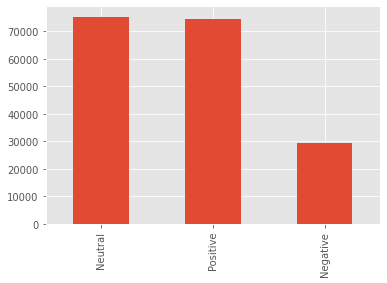

In [46]:
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

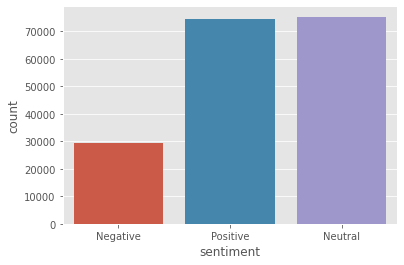

In [47]:
sns.countplot(df['sentiment'])

## Keyword Extraction

In [48]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [49]:
positive_tweet

1         Hey and  wouldnt it have made more sense to ha...
6         How Will Change Work in General (and recruitin...
8                 Praying for good health and recovery of  
12         — no one will be safe from until everyone is ...
13        Lets all protect ourselves from Its real and t...
                                ...                        
179096    We were really bummed we couldn’t cop one of t...
179103    Thanks for nominating me for the challenge I n...
179104                       2020 The year of insanity Lol 
179105     A powerful painting by Juan Lucena Its a trib...
179106    More than 1200 students test positive for at m...
Name: clean_tweet, Length: 74339, dtype: object

In [50]:
# Remove stopwords and convet into tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()

In [51]:
positive_tweet_list

ntified…',
 '1336861 total confirmed cases 849432 cases cured/recovered 15849068 samples tested He…',
 'lifelong Seinfeldesque germaphobe reassuring resear…',
 'White neighborhoods access testing sites—even disease hitting Black Hispanic co…',
 'COVID19: 2984 fresh cases active cases cross',
 'Kuwait reports 684 new cases 692 new recoveries',
 'government needs step save American businesses going spiral second Great Depre…',
 'Heres hashes people r getting tired seeing evidence Wayfair Maddy mcann etc not…',
 'According women talked (and internal social media) got case One…',
 'SRASCoV2 experiments available kind research…',
 'latest 1310 report shows link risk dying new…',
 'Thanks initiatives fight…',
 'Face masks: important pandemic Read ()',
 'unprecedented situation important care loved ones Check f…',
 'advocating teachers Youre comfortable teachers returning school the…',
 'Awhad undergoing treatment Deenanath hospital test reports came positive said family mem…',
 'Luckily unde

In [52]:
# Tokenization Concept
for line in positive_tweet_list:
    # print(line)
    for token in line.split():
        print(token)

pandemic
Proud
some…
Veteran
Affairs
reports
21
new
cases
bringing
total
confirmed
cases
51545
2873
total
deaths
12…
SIERRA
LEONE
4
new
confirmed
cases
new
death
1
new
recovered
Total:
Confirmed
cases
of…
neighbourhood
statue
good
sense
mask
Don’t
victim
especially
business
online
sure
to…
latest
episode
Monideepa
discusses
amp
Changing
Business
landscape
Liste…
–
New
guidance
schools
England
manage
future
outbreaks
publish…
Things
looking
better
Government
Opening
Markets
amp
Offices
Sports
Leauge
audience
good
to…
Stand
“dots”
think
you’ll
stand
year
Clean
Download
share
image
here:
accepted
won’t
stricter
protocols
Sept
3
what’s
happening
Clients
number
priority
equipped
correct
gear
unp…
Saddened
hear
death
distressed
headlines
like
*NOT…
Hurricane
Katrinas
15th
Anniversary
hear
stories
New
Orleans
educators
tapped…
Indiana
farmers
find
surprising
bounty
year
surroundings
panic
tension
free
Corruption
danger
weve
told
Stay
home
wear
mask
stay
safe
#
Mar
19
Mar
20
exciting
year
amp


In [53]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list for token in line.split()]
neg_tokens = [token for line in negative_tweet_list for token in line.split()]

In [54]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous',
 'ap

In [55]:
# Most Common Keyword 
from collections import Counter

In [56]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [57]:
get_tokens(pos_tokens)

{'cases': 10329,
 'new': 9949,
 'amp': 5315,
 'positive': 3890,
 'people': 3659,
 'New': 3359,
 'deaths': 3294,
 'COVID19': 2750,
 'pandemic': 1933,
 'total': 1795,
 'reported': 1773,
 'safe': 1679,
 'today': 1665,
 'confirmed': 1523,
 'latest': 1468,
 'good': 1458,
 'like': 1458,
 'time': 1456,
 '|': 1456,
 'tested': 1400,
 'need': 1394,
 '24': 1380,
 'coronavirus': 1368,
 'day': 1341,
 'India': 1272,
 '2020': 1272,
 'number': 1270,
 'right': 1267,
 'reports': 1264,
 'Total': 1255}

In [58]:
most_common_positive_words = get_tokens(pos_tokens)
most_common_neutral_words  = get_tokens(neut_tokens)
most_common_negative_words = get_tokens(neg_tokens)

In [59]:
# Plot with seaborn
negative_df = pd.DataFrame(most_common_negative_words.items(), columns=['words', 'scores'])

In [60]:
negative_df

words  scores
0           cases    2244
1             amp    2040
2          people    1807
3        pandemic     896
4          spread     870
5           daily     759
6            like     756
7         COVID19     751
8            slow     734
9             new     724
10           risk     713
11         deaths     679
12       symptoms     621
13            day     602
14           Help     574
15           time     568
16           long     549
17             y…     547
18         health     535
19       identify     533
20         sooner     529
21           know     528
22  selfreporting     522
23          virus     518
24           dead     510
25           hard     489
26           mask     480
27          going     476
28            bad     475
29          India     470

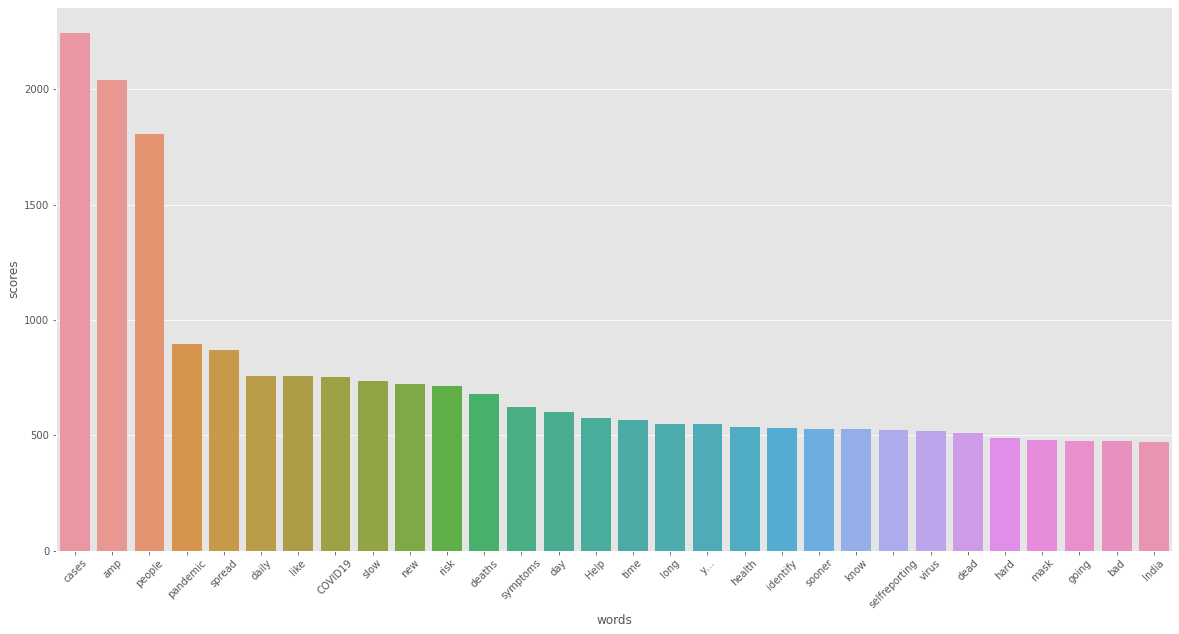

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='scores', data=negative_df)
plt.xticks(rotation=45)
plt.show()

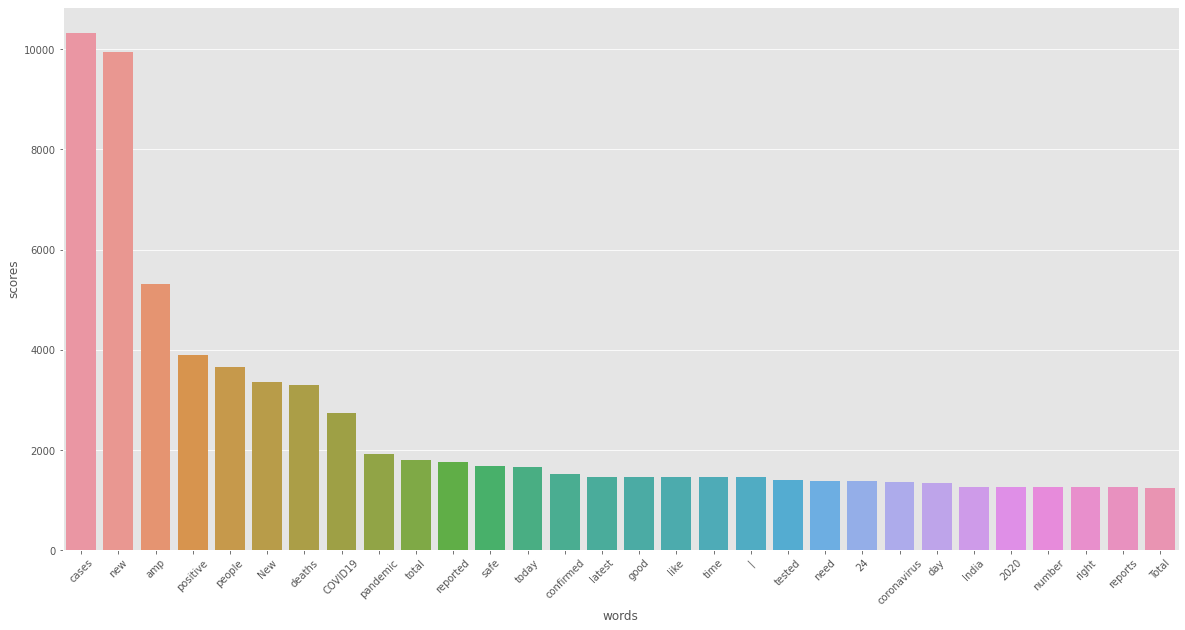

In [71]:
positive_df = pd.DataFrame(most_common_positive_words.items(), columns=['words', 'scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='scores', data=positive_df)
plt.xticks(rotation=45)
plt.show()

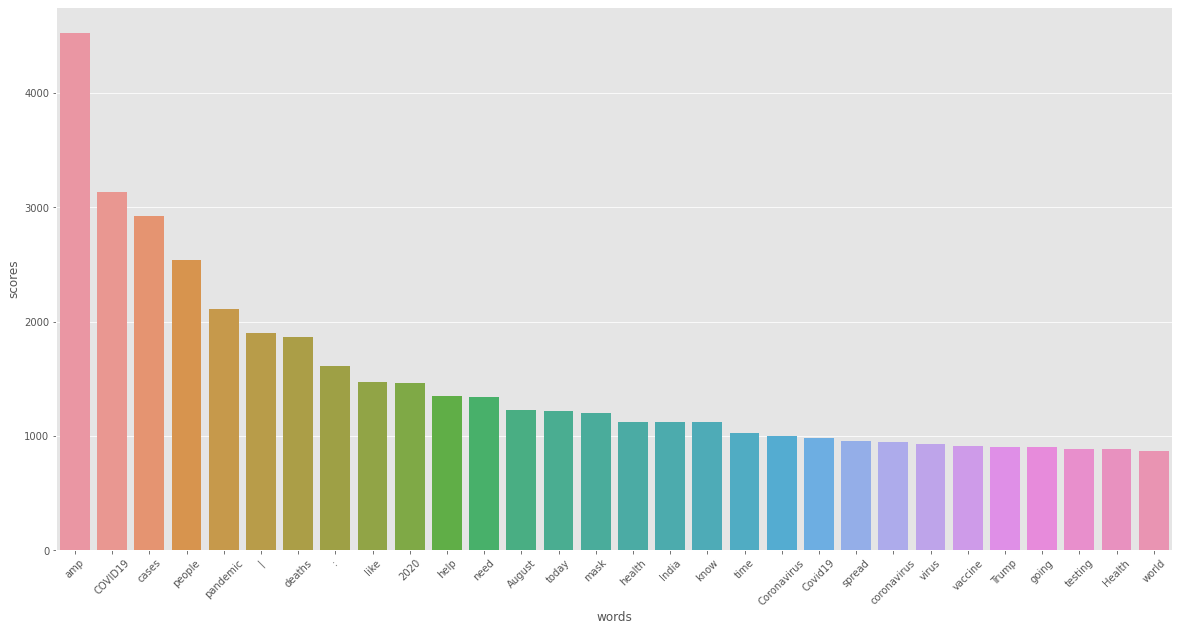

In [72]:
neutral_df = pd.DataFrame(most_common_neutral_words.items(), columns=['words', 'scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='scores', data=neutral_df)
plt.xticks(rotation=45)
plt.show()

In [73]:
## Word Cloud
from wordcloud import WordCloud

In [74]:
def plot_wordcloud(text):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [75]:
pos_text = ' '.join(pos_tokens)
neut_text = ' '.join(neut_tokens)
neg_text = ' '.join(neg_tokens)

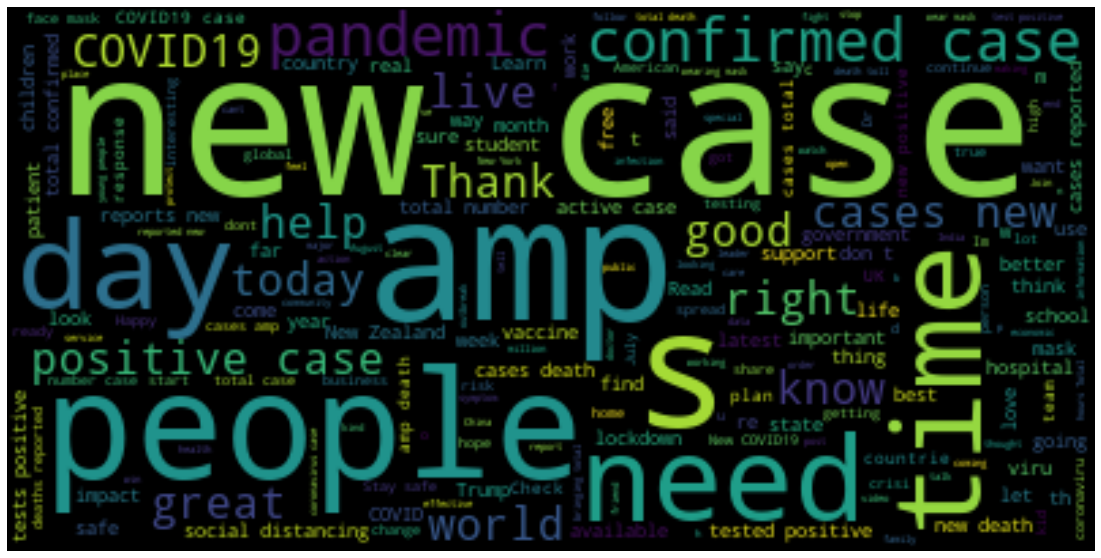

In [76]:
plot_wordcloud(pos_text)

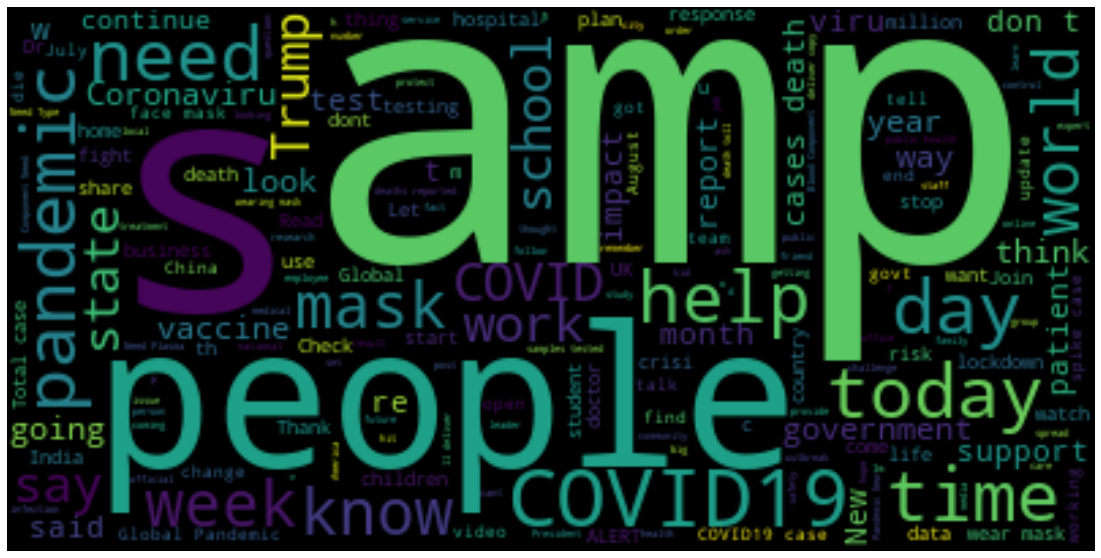

In [77]:
plot_wordcloud(neut_text)

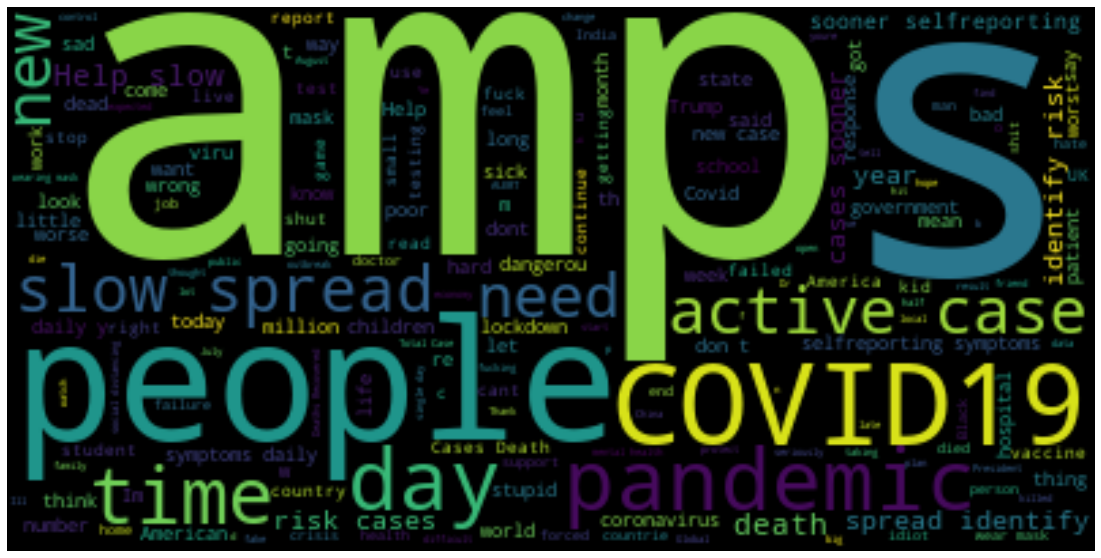

In [78]:
plot_wordcloud(neg_text)